In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Imarticus/PGA44/Decision_tree/used_car.csv")

In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df["maker"]=df["Name"].str.split(" ",expand=True)[0]

In [ ]:
df.drop(["Name"],axis=1,inplace=True)

In [ ]:
df["Location"].value_counts(dropna=False)

,count
Location,
Mumbai,790
Hyderabad,742
Kochi,651
Coimbatore,636
Pune,622
Delhi,554
Kolkata,535
Chennai,494
Jaipur,413


In [ ]:
df["Fuel_Type"].value_counts(dropna=False)

,count
Fuel_Type,
Diesel,3205
Petrol,2746
CNG,56
LPG,10
Electric,2


In [ ]:
df["Transmission"].value_counts(dropna=False)

,count
Transmission,
Manual,4299
Automatic,1720


In [ ]:
df["Owner_Type"].value_counts(dropna=False)

,count
Owner_Type,
First,4929
Second,968
Third,113
Fourth & Above,9


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


In [ ]:
df["Power"].dtypes

dtype('O')

In [ ]:
df["Power"]=df["Power"].str.split(" ",expand=True)[0]

In [ ]:
df["Power"]=pd.to_numeric(df["Power"],errors="coerce")

In [ ]:
df["Power"].dtype

dtype('float64')

In [ ]:
num_data=df.select_dtypes(exclude="object")
obj_data=df.select_dtypes(include="object")

In [ ]:
def outliers(x):
  x=x.clip(lower=x.quantile(0.01))
  x=x.clip(upper=x.quantile(0.99))
  return x

In [ ]:
num_data=num_data.apply(outliers)

In [ ]:
data=pd.concat([num_data,obj_data],axis=1)

In [ ]:
data.isnull().sum()

,0
Year,0
Kilometers_Driven,0
Mileage,2
Engine,36
Power,143
Seats,42
Price,0
Location,0
Fuel_Type,0
Transmission,0


In [ ]:
data.shape

(6019, 12)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(5872, 12)

In [ ]:
# (6019-5872)/6019

In [ ]:
final_data=pd.get_dummies(data,drop_first=True)

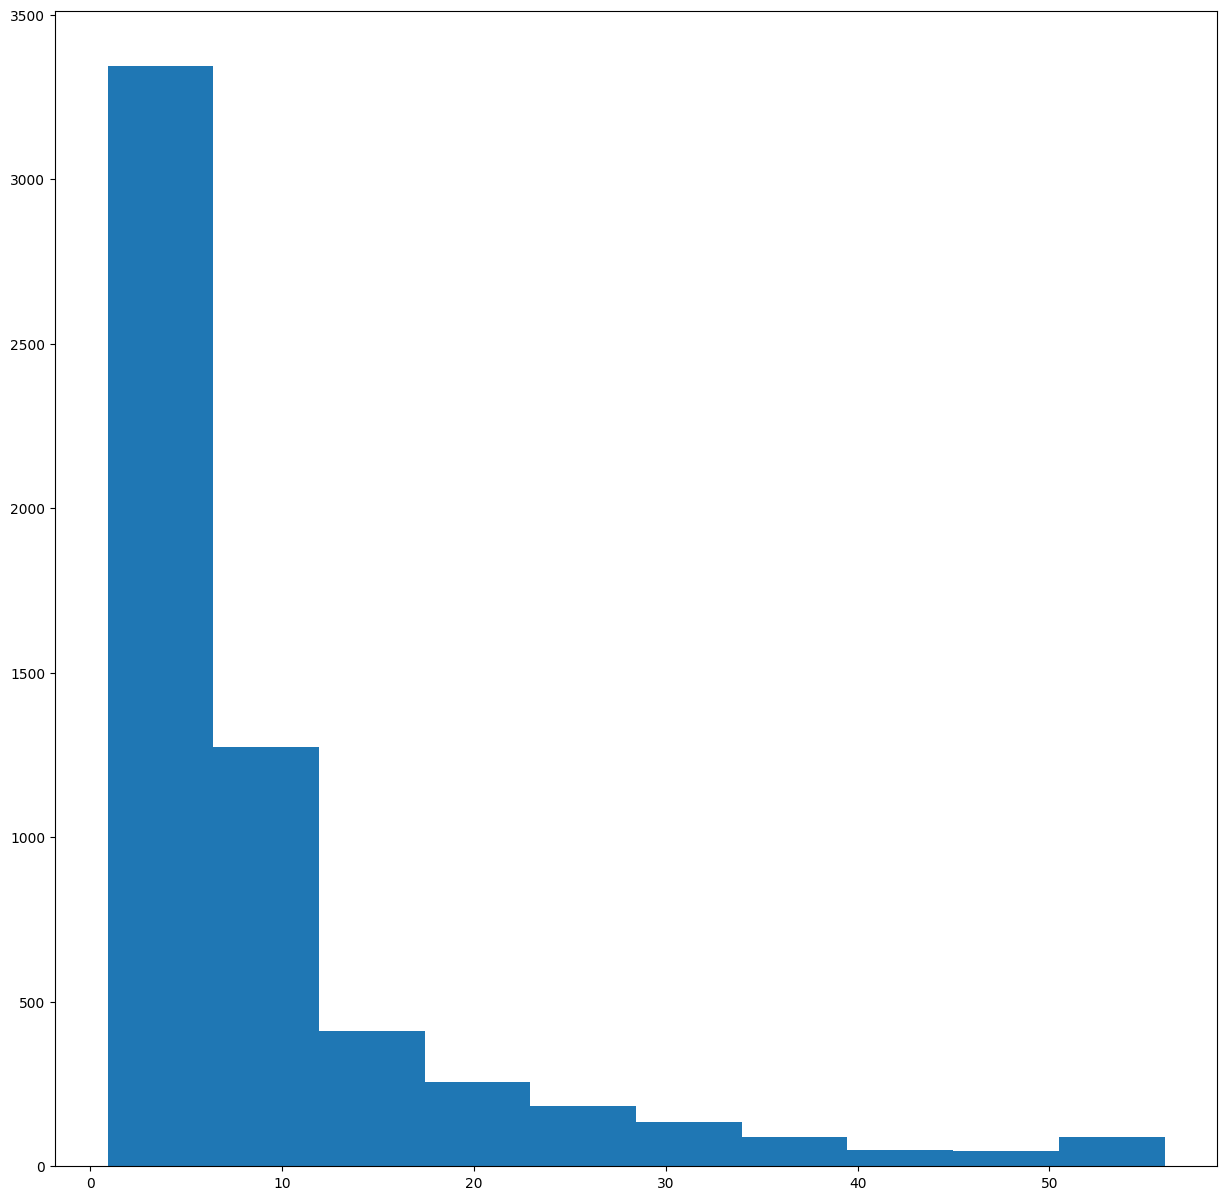

In [ ]:
plt.figure(figsize=(15,15))
plt.hist(final_data["Price"])
plt.show()

In [ ]:
from scipy.stats import jarque_bera

In [ ]:
jarque_bera(final_data["Price"])

SignificanceResult(statistic=16098.257166596262, pvalue=0.0)

In [ ]:
final_data["trans_price"]=(final_data["Price"])**(1/40000)
jarque_bera(final_data["trans_price"])

SignificanceResult(statistic=196.5809120195645, pvalue=2.0558779622762843e-43)

In [ ]:
y=final_data["Price"]
x=final_data.drop(["Price","trans_price"],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#

In [ ]:
dt0=DecisionTreeRegressor()
dt0.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
print("Train Score-R^2 ", dt0.score(x_train,y_train))
print("Test Score-R^2 ", dt0.score(x_test,y_test))

Train Score-R^2  0.9999948111604513
Test Score-R^2  0.8824114362286819


In [ ]:
help(dt0)

Help on DecisionTreeRegressor in module sklearn.tree._classes object:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's impro

In [ ]:
x_train.shape

(4697, 52)

In [ ]:
dt0=DecisionTreeRegressor(criterion="absolute_error", max_depth=7, min_samples_split=20)
dt0.fit(x_train,y_train)
print("Train Score-R^2 ", dt0.score(x_train,y_train))
print("Test Score-R^2 ", dt0.score(x_test,y_test))


Train Score-R^2  0.9015325050654296
Test Score-R^2  0.8740497110205788


In [ ]:
4*9*5*7*10

12600

In [ ]:
params={"criterion":["squared_error", "friedman_mse", "absolute_error","poisson"],
             "max_depth":[5,7,9,10, 11, 15, 17,19, 20],
             "min_samples_split":[10,50,100,150, 200],
             "min_samples_leaf":[2,5,10,50, 70, 100, 150]}

dt2=DecisionTreeRegressor(random_state=0)

gserach_dt=GridSearchCV(estimator=dt2,
                        param_grid=params,
                        cv=10, n_jobs=-1,
                        # refit=True,
                        # scoring=["recall"]
                        )
gserach_dt.fit(x_train, y_train)